<a href="https://colab.research.google.com/github/ELopez2657/Python_proyect_3_Data_Jobs_Analysis/blob/main/Data_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('/content/data_Jobs_data.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
df.shape

(607, 12)

In [21]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [22]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
df = df.drop(['Unnamed: 0','salary'], axis=1)

In [24]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


## Average salary per year

In [25]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

[Text(0, 0, '95813 USD'), Text(0, 0, '99854 USD'), Text(0, 0, '124522 USD')]

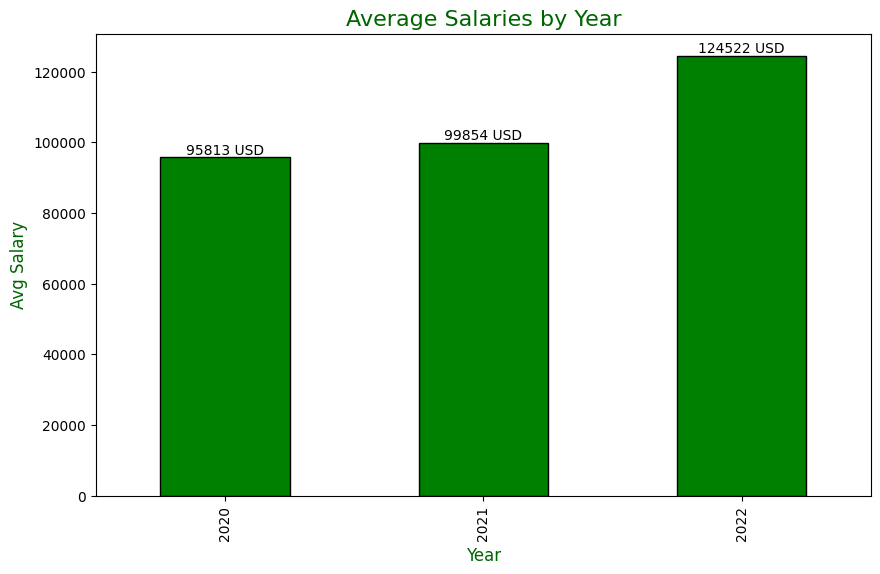

In [26]:
df1=pd.DataFrame(df1)
df1['salary_in_usd'] = df1['salary_in_usd'].round(0).astype(int)

fig1=df1.plot(kind='bar', figsize=(10,6), legend=False,color='green' ,edgecolor='black')
plt.xlabel('Year', color='DarkGreen', fontsize=12)
plt.ylabel('Avg Salary', color='DarkGreen', fontsize=12)
plt.title('Average Salaries by Year', color='DarkGreen', fontsize=16)

fig1.bar_label(fig1.containers[0], labels=df1['salary_in_usd'].map('{:} USD'.format))

## Remote Ratio

In [27]:
df2 = df['remote_ratio'].value_counts()

In [28]:
y2= df2.values.tolist()
y2

[381, 127, 99]

In [29]:
x2=['Full Remote','No Remote', 'Partially Remote']
x2

['Full Remote', 'No Remote', 'Partially Remote']

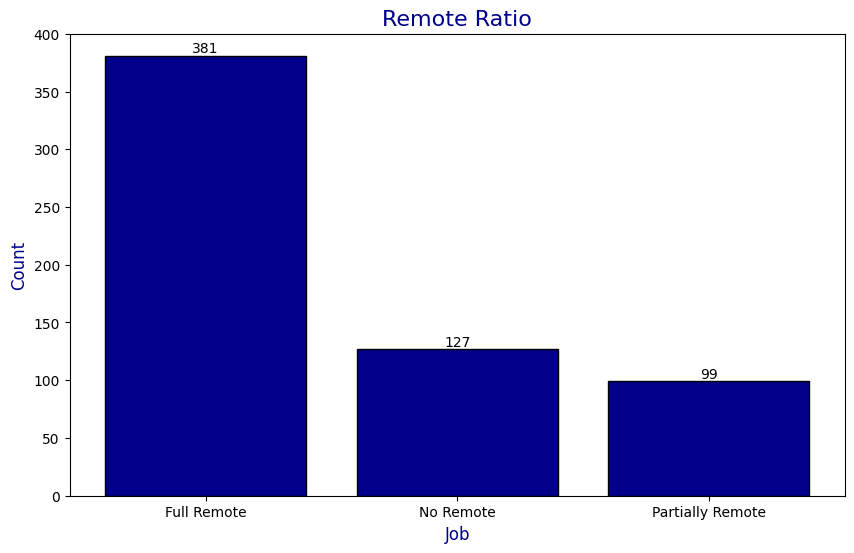

In [117]:
plt.figure(figsize=(10, 6))
fig2 = plt.bar(x2, y2,color="DarkBlue" ,edgecolor='black')
plt.title('Remote Ratio', color='DarkBlue', fontsize=16)
plt.xlabel('Job', color='DarkBlue', fontsize=12)
plt.ylabel('Count', color='DarkBlue', fontsize=12)
plt.bar_label(fig2, y2)
plt.show()

## Company size

In [31]:
df3 = df['company_size'].value_counts()
df3

M    326
L    198
S     83
Name: company_size, dtype: int64

In [32]:
x3 = df3.values.tolist()
x3

[326, 198, 83]

In [33]:
y3 = ['Medium', 'Large', 'Small']
y3

['Medium', 'Large', 'Small']

Text(0.5, 1.0, 'Company Size')

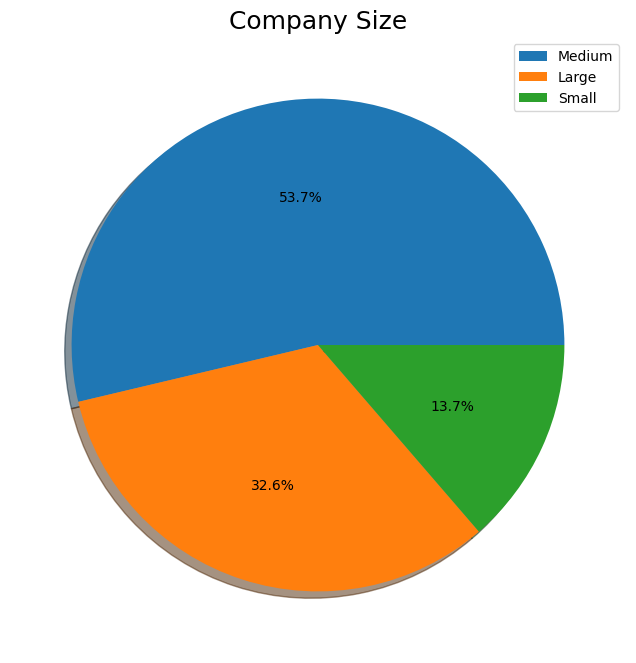

In [112]:
plt.figure(figsize=(12,8))
plt.pie(x=x3, autopct='%1.1f%%', shadow=True)
plt.legend(labels=y3)
plt.title('Company Size', color='black',fontsize=18)

## Top 5 Data Jobs

In [35]:
df4=df['job_title'].value_counts()
df4

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [36]:
df4 = df['job_title'].value_counts().head(5)
df4

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

<ipython-input-37-680e03412741>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4,palette='deep', edgecolor='black')


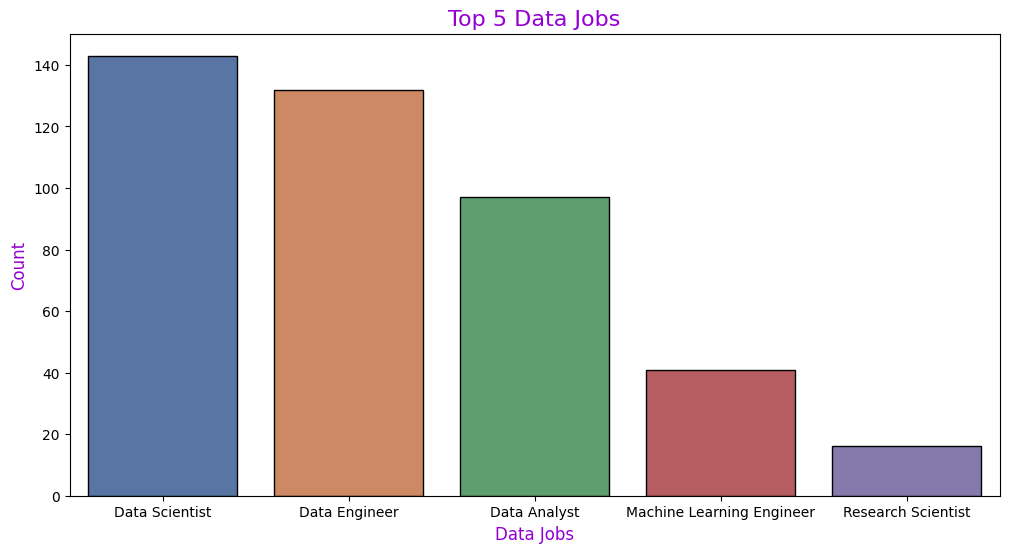

In [37]:
plt.figure(figsize=(12, 6))
#fig2 = plt.bar(x= df4.index,edgecolor='black')
sns.barplot(data=df4,palette='deep', edgecolor='black')
plt.title('Top 5 Data Jobs', color='DarkViolet', fontsize=16)
plt.xlabel('Data Jobs', color='DarkViolet', fontsize=12)
plt.ylabel('Count', color='DarkViolet', fontsize=12)
#plt.bar_label(fig2, y2)
plt.show()

## Salary distribution by Company Size

In [38]:
df5 = df[['company_size','salary_in_usd']]
df5

,company_size,salary_in_usd
0,L,79833
1,S,260000
2,M,109024
3,S,20000
4,L,150000
...,...,...
602,M,154000
603,M,126000
604,M,129000
605,M,150000


In [39]:
# small = df[df["company_size"]=='S']
# small = small["salary_in_usd"].mean().astype(int)

# medium = df[df["company_size"]=='M']
# medium = medium["salary_in_usd"].mean().astype(int)

# large = df[df["company_size"]=='L']
# large = large["salary_in_usd"].mean().astype(int)

# x5=[small, medium, large]
# x5

In [40]:
sizes = ['S', 'M', 'L']
x5 = []

for size in sizes:
    subset = df[df["company_size"] == size]
    mean_salary = subset["salary_in_usd"].mean().round(2)
    x5.append(mean_salary)

x5

[77632.67, 116905.47, 119242.99]

In [41]:
y5 = ['Medium', 'Large', 'Small']

In [42]:
bar_labels = np.round([x/1000 for x in x5],2)
bar_labels = bar_labels.astype(str)
bar_labels = [x + ' k' for x in bar_labels]
bar_labels

['77.63 k', '116.91 k', '119.24 k']

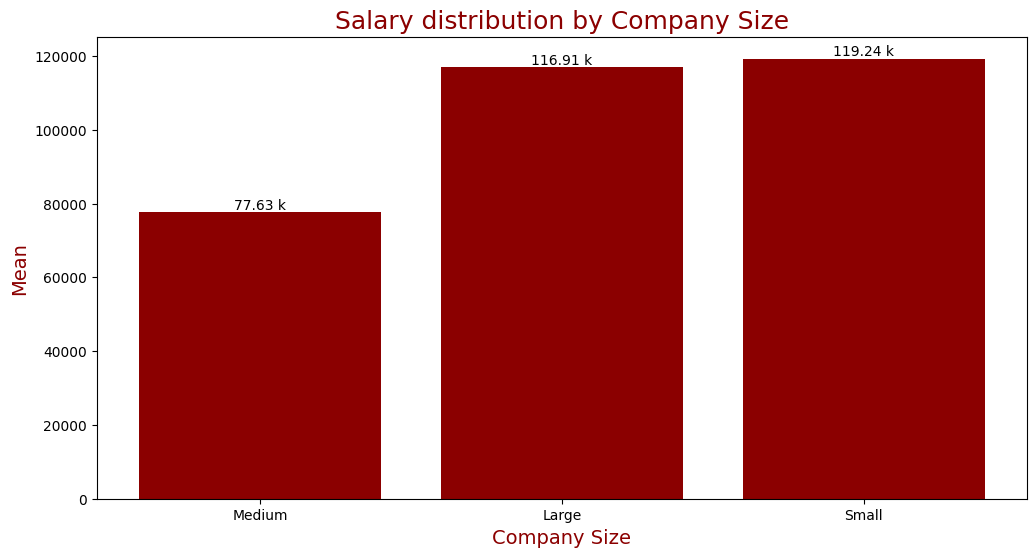

In [104]:
plt.figure(figsize=(12, 6))
#fig5= sns.barplot(y=x5, x=y5, palette='icefire', edgecolor='black')
fig5=plt.bar(y5,x5,color='DarkRed')
plt.title('Salary distribution by Company Size', color='DarkRed', fontsize=18)
plt.xlabel('Company Size', color='DarkRed', fontsize=14)
plt.ylabel('Mean', color='DarkRed', fontsize=14)
plt.bar_label(fig5, bar_labels)
plt.show()

<ipython-input-76-8cbd8db31ff3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(small, label='Small', kde=True, palette="icefire", edgecolor='black')


<Axes: xlabel='salary_in_usd', ylabel='Count'>

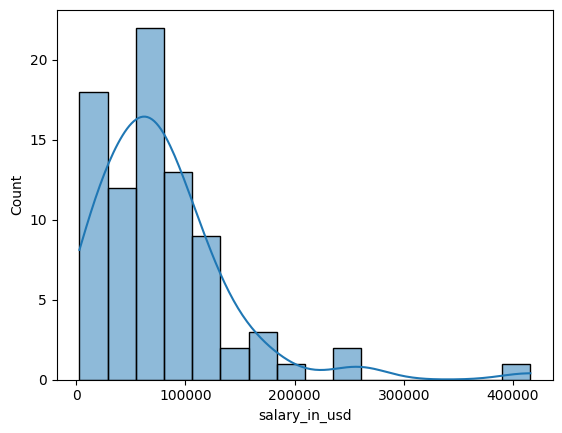

In [76]:
small = df[df["company_size"]=='S']
small = small["salary_in_usd"]
sns.histplot(small, label='Small', kde=True, palette="icefire", edgecolor='black')

<ipython-input-75-13fd14833f64>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(medium, label='Medium', kde=True, palette="icefire", edgecolor='black')


<Axes: xlabel='salary_in_usd', ylabel='Count'>

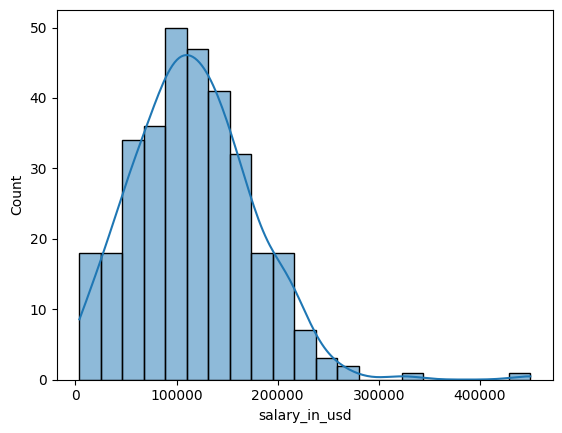

In [75]:
medium = df[df["company_size"]=='M']
medium = medium["salary_in_usd"]
sns.histplot(medium, label='Medium', kde=True, palette="icefire", edgecolor='black')

<ipython-input-74-1253bb828372>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(large, label='Large', kde=True, palette="icefire", edgecolor='black')


<Axes: xlabel='salary_in_usd', ylabel='Count'>

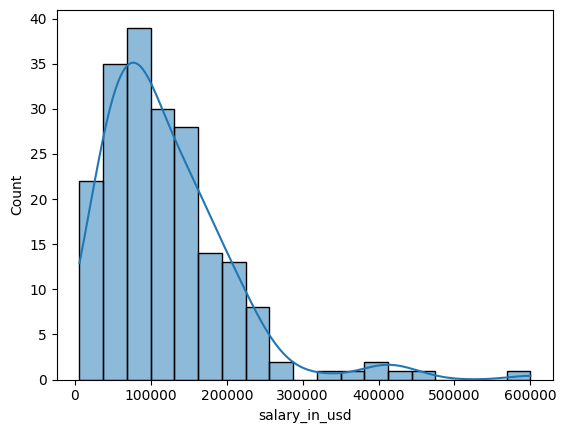

In [74]:
large = df[df["company_size"]=='L']
large = large["salary_in_usd"]
sns.histplot(large, label='Large', kde=True, palette="icefire", edgecolor='black')

<Axes: title={'center': 'Comparation Salary Between Company Sizes'}, xlabel='Company Size', ylabel='Count'>

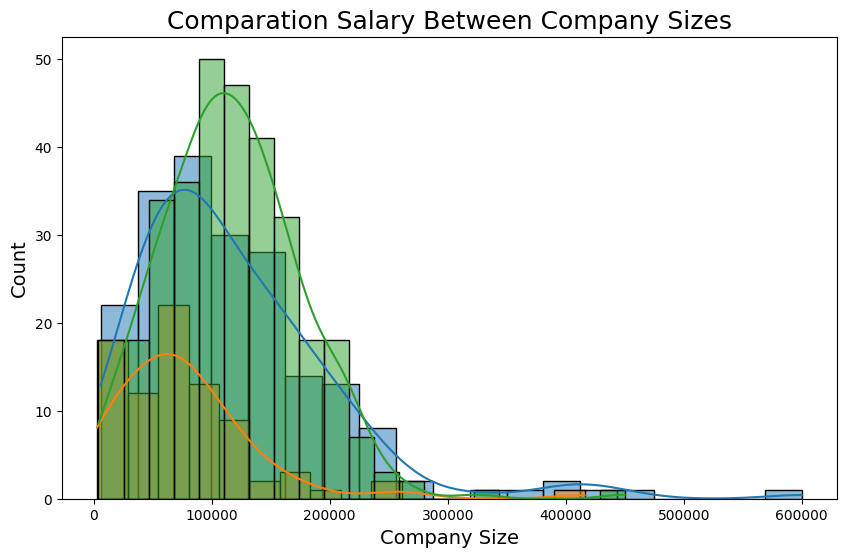

In [82]:
plt.figure(figsize=(10,6))
plt.title('Comparation Salary Between Company Sizes',color='black', fontsize=18)
plt.xlabel('Company Size', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)

sns.histplot(large, label='Large', kde=True, edgecolor='black')
sns.histplot(small, label='Small', kde=True, edgecolor='black')
sns.histplot(medium, label='Medium', kde=True, edgecolor='black')


## Experience Level

In [83]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [100]:
df6 = df['experience_level'].value_counts()
df6

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [102]:
df6.index = df6.index.str.replace('SE','SENIOR')
df6.index = df6.index.str.replace('MI','MIDDLE')
df6.index = df6.index.str.replace('EN','ENTRY LEVEL')
df6.index = df6.index.str.replace('EX','EXECUTIVE')
#df6.index = df6.index.str.replace({'SE': 'SENIOR', 'MI': 'MIDDLE', 'EN': 'ENTRY LEVEL', 'EX': 'EXECUTIVE'})
df6

SENTRY LEVELIOR    280
MIDDLE             213
ENTRY LEVEL         88
EXECUTIVE           26
Name: experience_level, dtype: int64

Text(0.5, 1.0, 'Experience Level')

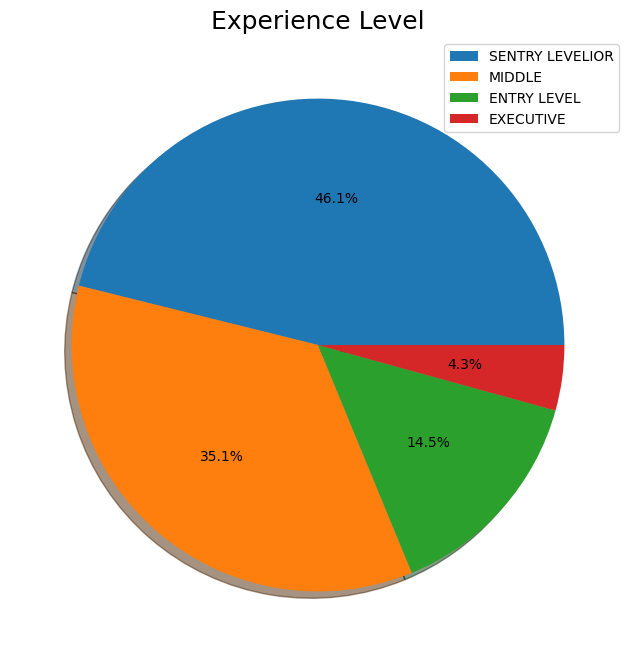

In [116]:
plt.figure(figsize=(12,8))
plt.pie(x=df6.values, autopct='%1.1f%%', shadow=True)
plt.legend(labels=df6.index)
plt.title('Experience Level', color='black',fontsize=18)